In [1]:
import pandas as pd
import torch.nn as nn
import torch
import numpy as np
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.autograd import Variable
import os
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')
data['Date'] = pd.to_datetime(data['Date'], format='%Y-%m-%d')
data

,Date,Close,Open,High,Low,PE,Ratio
0,1960-01-04,59.910000,59.910000,59.910000,59.910000,18.34,17.12
1,1960-01-05,60.389999,60.389999,60.389999,60.389999,18.34,17.12
2,1960-01-06,60.130001,60.130001,60.130001,60.130001,18.34,17.12
3,1960-01-07,59.689999,59.689999,59.689999,59.689999,18.34,17.12
4,1960-01-08,59.500000,59.500000,59.500000,59.500000,18.34,17.12
...,...,...,...,...,...,...,...
15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


In [3]:
rows = [x for x in data.index if data.loc[x]['Open'] == 0]
data = data.drop(rows, axis=0)

In [4]:
test_data = data.loc[ (data['Date']  >= '1980-01-01' )]
test_data

,Date,Close,Open,High,Low,PE,Ratio
5015,1980-01-02,105.760002,107.940002,108.430000,105.290001,8.85,7.39
5016,1980-01-03,105.220001,105.760002,106.080002,103.260002,8.85,7.39
5017,1980-01-04,106.519997,105.220001,107.080002,105.089996,8.85,7.39
5018,1980-01-07,106.809998,106.519997,107.800003,105.800003,8.85,7.39
5019,1980-01-08,108.949997,106.809998,109.290001,106.290001,8.85,7.39
...,...,...,...,...,...,...,...
15671,2022-02-11,4418.640000,4506.270000,4526.330000,4401.410000,37.56,25.93
15672,2022-02-14,4401.670000,4412.610000,4426.220000,4364.840000,37.56,25.93
15673,2022-02-15,4471.070000,4429.280000,4472.770000,4429.280000,37.56,25.93
15674,2022-02-16,4475.010000,4455.750000,4489.550000,4429.680000,37.56,25.93


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

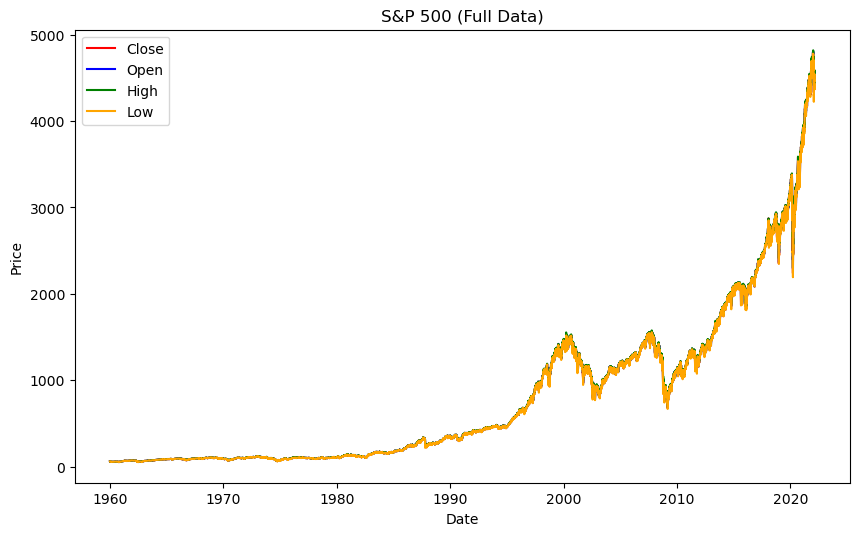

In [9]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(data.Date, data.Close.values,'red', label = 'Close')
plt.plot(data.Date, data.Open.values, 'blue', label = 'Open')
plt.plot(data.Date, data.High.values, 'green', label = 'High')
plt.plot(data.Date, data.Low.values, 'orange', label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Full Data)")
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

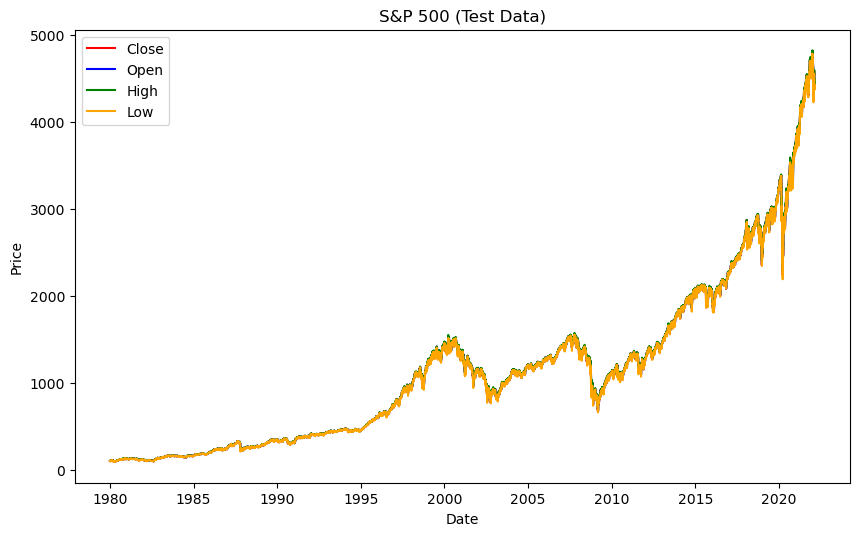

In [10]:
plt.figure(figsize=[10,6], dpi=100)
plt.plot(test_data.Date, test_data.Close.values,'red', label = 'Close')
plt.plot(test_data.Date, test_data.Open.values, 'blue', label = 'Open')
plt.plot(test_data.Date, test_data.High.values, 'green', label = 'High')
plt.plot(test_data.Date, test_data.Low.values, 'orange', label = 'Low')
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.title("S&P 500 (Test Data)")
plt

In [11]:
dataset = data[['Close', 'Open', 'High', 'Low']].values
scaler = MinMaxScaler(feature_range = (0, 1))
dataset = scaler.fit_transform(dataset)
dataset

array([[0.00162509, 0.00162237, 0.00161757, 0.00181023],
       [0.00172626, 0.00172337, 0.00171827, 0.00191173],
       [0.00167146, 0.00166866, 0.00166372, 0.00185675],
       ...,
       [0.93139433, 0.92104261, 0.9274403 , 0.92582301],
       [0.93222479, 0.92661253, 0.93096076, 0.9259076 ],
       [0.91225371, 0.92667776, 0.92393453, 0.91409249]])

In [12]:
test_dataset = test_data[['Close', 'Open', 'High', 'Low']].values
test_dataset = scaler.fit_transform(test_dataset)
test_dataset

array([[0.00160482, 0.00206532, 0.00187538, 0.00236032],
       [0.00148989, 0.00160211, 0.0013774 , 0.00192709],
       [0.00176658, 0.00148737, 0.00158931, 0.00231763],
       ...,
       [0.93072234, 0.92027053, 0.92671179, 0.92514421],
       [0.93156093, 0.92589492, 0.9302676 , 0.92522958],
       [0.91139424, 0.92596079, 0.92317081, 0.91330634]])

In [13]:
date = data[['Date']].values
date.shape

(15640, 1)

In [14]:
test_date = test_data[['Date']].values
test_date.shape

(10625, 1)

In [15]:
# training:0: 0 -180：181 当你输入0-180 predict：181
# 1: 1 -181: 182    1-181， predict：182


# test:2. 200-380 predict：x
#         ｜x - actual｜ / actual 


seq_len = 180
input_size = 4
output_size = 4

real_list = []
label_list = []
date_list = []
for i in range(dataset.shape[0] - seq_len - output_size + 1):
    real_list.append(dataset[i: i + seq_len, ])
    label_list.append(dataset[i + seq_len: i + seq_len + output_size, 0])
    date_list.append(date[i + seq_len])
real_list = np.array(real_list)
label_list = np.array(label_list)
date_list = np.array(date_list)
label_list = np.reshape(label_list, (label_list.shape[0], 1, label_list.shape[1]))
print("real_list: " , real_list.shape)
print("label_list: " , label_list.shape)
print("date_list: " , date_list.shape)

real_list:  (15457, 180, 4)
label_list:  (15457, 1, 4)
date_list:  (15457, 1)


In [16]:
seq_len = 180
input_size = 4
output_size = 4

test_real = []
test_label = []
test_date_list = []
for i in range(test_dataset.shape[0] - seq_len - output_size + 1):
    test_real.append(test_dataset[i: i + seq_len, ])
    test_label.append(test_dataset[i + seq_len: i + seq_len + output_size, 0])
    test_date_list.append(test_date[i + seq_len])
test_real = np.array(test_real)
test_label = np.array(test_label)
test_date_list = np.array(test_date_list)
test_label = np.reshape(test_label, (test_label.shape[0], 1, test_label.shape[1]))
print("test_real_list: " , test_real.shape)
print("test_label_list: " , test_label.shape)
print("test_date_list: " , test_date_list.shape)

test_real_list:  (10442, 180, 4)
test_label_list:  (10442, 1, 4)
test_date_list:  (10442, 1)


In [17]:
real_train_list = []
label_train_list = []
real_test_list = []
label_test_list = []
date_train_list = []
date_test_list = []

"""
80% 用于训练
"""
for i in range(real_list.shape[0]):
    if i % real_list.shape[0] <= real_list.shape[0] * 0.8:
        real_train_list.append(real_list[i,])
        label_train_list.append(label_list[i,])
        date_train_list.append(date_list[i,])
    else:
        real_test_list.append(real_list[i,])
        label_test_list.append(label_list[i,])
        date_test_list.append(date_list[i,])
real_train_list = np.array(real_train_list)
label_train_list = np.array(label_train_list)
real_test_list = np.array(real_test_list)
label_test_list = np.array(label_test_list)
date_train_list = np.array(date_train_list)
date_test_list = np.array(date_test_list)
print("real_train_list: " , real_train_list.shape)
print("label_train_list: " , label_train_list.shape)
print("real_test_list: " , real_test_list.shape)
print("label_test_list: " , label_test_list.shape)
print("date_train_list: " , date_train_list.shape)
print("date_test_list: " , date_test_list.shape)

real_train_list:  (12366, 180, 4)
label_train_list:  (12366, 1, 4)
real_test_list:  (3091, 180, 4)
label_test_list:  (3091, 1, 4)
date_train_list:  (12366, 1)
date_test_list:  (3091, 1)


In [27]:
class RNN(nn.Module):
    def __init__(self, input_size, output_size, hidden_size, num_layers):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers        
        self.rnn = nn.RNN(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first = True)
        self.linear = nn.Linear(hidden_size, output_size)
    
    def forward(self, x):
#         print(x.shape)
        batch_size = x.size(0)
        hidden = self.init_hidden(batch_size)
        res, hidden = self.rnn(x, hidden)
        res = self.linear(res)
        return res[:, -1, :], hidden
        
    def init_hidden(self, batch_size):
        # This method generates the first hidden state of zeros which we'll use in the forward pass
        # We'll send the tensor holding the hidden state to the device we specified earlier as well
        hidden = torch.zeros(self.num_layers, batch_size, self.hidden_size)
        return hidden

In [28]:
hidden_size = 60
num_layers = 1
learning_rate = 0.001
num_epochs = 100

In [30]:
model = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = nn.MSELoss()
loss_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list).float())
    labels = Variable(torch.from_numpy(label_train_list).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0302
[10/100] Loss: 0.0075
[20/100] Loss: 0.0019
[30/100] Loss: 0.0003
[40/100] Loss: 0.0002
[50/100] Loss: 0.0001
[60/100] Loss: 0.0000
[70/100] Loss: 0.0000
[80/100] Loss: 0.0000
[90/100] Loss: 0.0000
[99/100] Loss: 0.0000


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

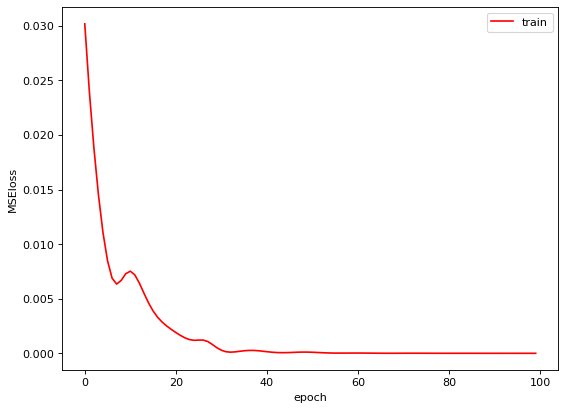

In [31]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [32]:
output, hidden = model(Variable(torch.from_numpy(test_real).float()))
output

tensor([[0.0050, 0.0043, 0.0059, 0.0059],
        [0.0051, 0.0045, 0.0060, 0.0061],
        [0.0053, 0.0047, 0.0062, 0.0063],
        ...,
        [0.6804, 0.6708, 0.7202, 0.6995],
        [0.6820, 0.6728, 0.7190, 0.7000],
        [0.6791, 0.6708, 0.7147, 0.6959]], grad_fn=<SliceBackward0>)

In [33]:
prediction = scaler.inverse_transform(output.detach().numpy())
prediction

array([[ 121.50436 ,  118.6399  ,  127.253   ,  121.80294 ],
       [ 122.21714 ,  119.26416 ,  128.01642 ,  122.586365],
       [ 123.09872 ,  120.31508 ,  128.82254 ,  123.555046],
       ...,
       [3295.126   , 3255.0251  , 3498.3518  , 3372.1833  ],
       [3302.6091  , 3264.4863  , 3492.6396  , 3374.1885  ],
       [3288.9302  , 3255.0764  , 3472.3735  , 3354.8984  ]],
      dtype=float32)

In [34]:
def calculate_prediction_error(predicted, actual):
    return abs(predicted - actual)/actual

In [35]:
actual = np.concatenate( (test_label[:, :, 0], test_label[:, :, 1], test_label[:, :, 2], test_label[:, :, 3]), axis = 1)
actual = scaler.inverse_transform(actual)
actual

array([[ 128.869995  ,  128.45106117,  130.74671332,  126.32417518],
       [ 128.399994  ,  129.30250546,  131.90177397,  125.35676108],
       [ 129.25      ,  130.45444535,  130.92749933,  126.29425619],
       ...,
       [4504.08      , 4425.95052648, 4421.99018921, 4455.41804922],
       [4418.64      , 4408.95181177, 4491.69595251, 4459.34754163],
       [4401.67      , 4478.4692426 , 4495.65331141, 4364.85023039]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

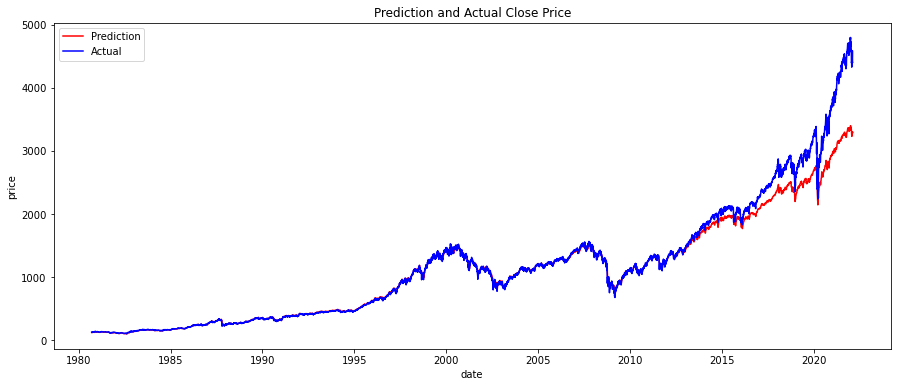

In [36]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

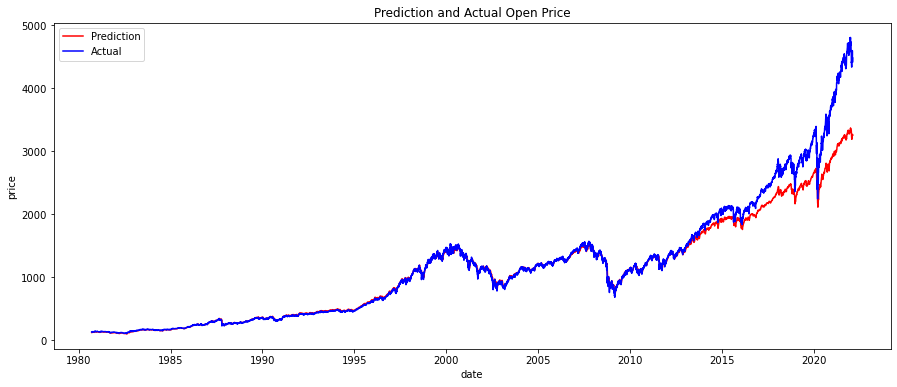

In [37]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

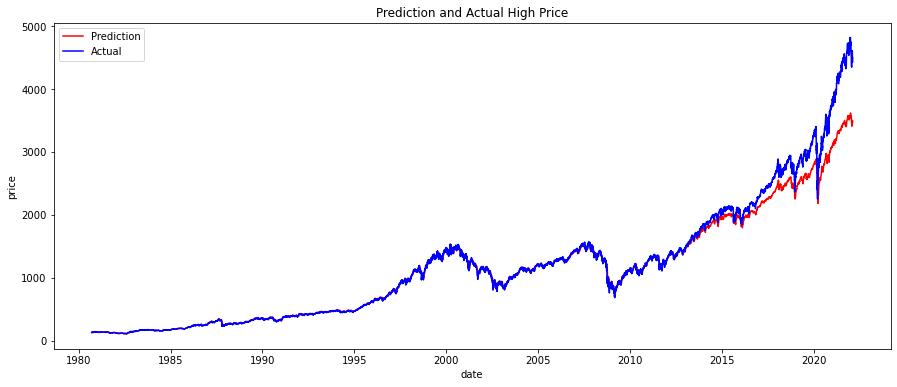

In [38]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

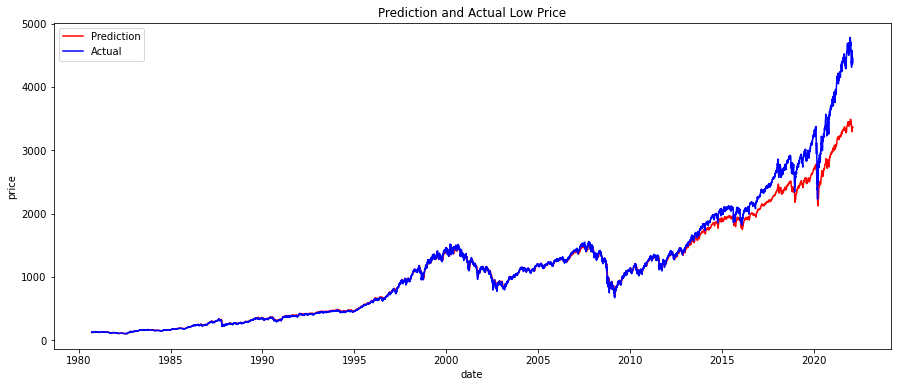

In [39]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [40]:
error = calculate_prediction_error(prediction, actual)
error.shape

(10442, 4)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

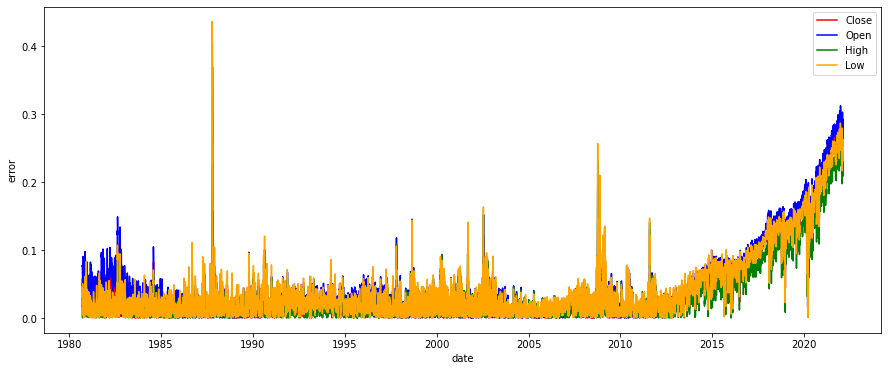

In [41]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], error[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0], error[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0], error[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0], error[:, 3], 'orange', label = 'Low')

plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("error")
plt.legend()
plt

In [45]:
# """

# validation ｜ 把training dataset 分成 80% 20%，其中20%用来做validation dataset

# """


real_val_list = []
label_val_list = []
real_train_list_new = []
label_train_list_new = []
date_train_list_new = []
date_val_list = []



for i in range(real_train_list.shape[0]):
    if i % real_train_list.shape[0] <= real_train_list.shape[0] * 0.8:
        real_train_list_new.append(real_train_list[i,])
        label_train_list_new.append(label_train_list[i,])
        date_train_list_new.append(date_train_list[i,])
    else:
        real_val_list.append(real_train_list[i,])
        label_val_list.append(label_train_list[i,])
        date_val_list.append(date_train_list[i,])
real_train_list_new = np.array(real_train_list_new)
label_train_list_new = np.array(label_train_list_new)
real_val_list = np.array(real_val_list)
label_val_list = np.array(label_val_list)
date_train_list_new = np.array(date_train_list_new)
date_val_list = np.array(date_val_list)
print("real_train_list_new: " , real_train_list_new.shape)
print("label_train_list_new: " , label_train_list_new.shape)
print("real_val_list: " , real_val_list.shape)
print("label_val_list: " , label_val_list.shape)
print("date_train_list_new: " , date_train_list_new.shape)
print("date_val_list: " , date_val_list.shape)

# """
# real_train_list_new:  (9893, 180, 4)
# 9893:batch size
# 180: seq length
# 4: feature
# """

real_train_list_new:  (9893, 180, 4)
label_train_list_new:  (9893, 1, 4)
real_val_list:  (2473, 180, 4)
label_val_list:  (2473, 1, 4)
date_train_list_new:  (9893, 1)
date_val_list:  (2473, 1)


In [46]:
model_val = RNN(input_size, output_size, hidden_size, num_layers)
optimizer = torch.optim.Adam(model_val.parameters(), lr=learning_rate)
criterion = nn.MSELoss()

loss_arr = []
loss_val_arr = []

for epoch in range(num_epochs):
    # make training sets in torch
    inputs = Variable(torch.from_numpy(real_train_list_new).float())
    labels = Variable(torch.from_numpy(label_train_list_new).float())
    
    # zero the parameter (weight) gradients
    optimizer.zero_grad()

    # Perform forward pass
    output, hidden = model_val(inputs)   
    
    # Compute loss
    loss = criterion(output.reshape(-1), labels.view(-1))
    loss_arr.append(loss.item())
       
    # Backward pass
    loss.backward(retain_graph=True)
       
    #loss for validation
    inputs_val = torch.from_numpy(real_val_list).float()
    labels_val = torch.from_numpy(label_val_list).float()
    output_val, hidden_val = model_val(inputs_val)
    loss_val = criterion(output_val.reshape(-1), labels_val.view(-1))
    loss_val_arr.append(loss_val.item())
    
    if (epoch % 10 == 0 or epoch == num_epochs - 1):
        print("[%d/%d] Loss: %.4f" % (epoch, num_epochs, loss.item()))
        print("[%d/%d] Loss_Val: %.4f" % (epoch, num_epochs, loss_val.item()))
    
    # Update parameters
    optimizer.step()                                

[0/100] Loss: 0.0347
[0/100] Loss_Val: 0.0973
[10/100] Loss: 0.0056
[10/100] Loss_Val: 0.0308
[20/100] Loss: 0.0031
[20/100] Loss_Val: 0.0339
[30/100] Loss: 0.0025
[30/100] Loss_Val: 0.0238
[40/100] Loss: 0.0017
[40/100] Loss_Val: 0.0177
[50/100] Loss: 0.0008
[50/100] Loss_Val: 0.0085
[60/100] Loss: 0.0001
[60/100] Loss_Val: 0.0009
[70/100] Loss: 0.0001
[70/100] Loss_Val: 0.0007
[80/100] Loss: 0.0000
[80/100] Loss_Val: 0.0002
[90/100] Loss: 0.0000
[90/100] Loss_Val: 0.0001
[99/100] Loss: 0.0000
[99/100] Loss_Val: 0.0000


<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

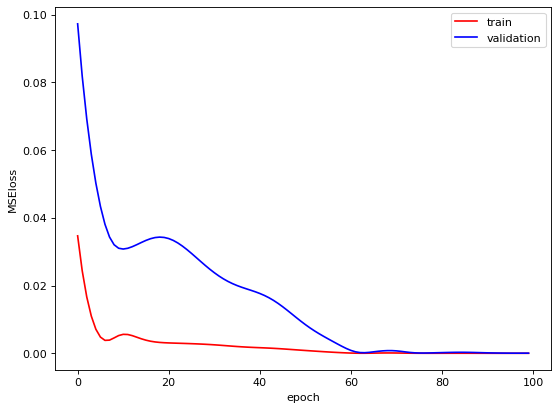

In [47]:
plt.figure(figsize=[8,6], dpi=80)
plt.plot(np.array(loss_arr), 'r', label = 'train')
plt.plot(np.array(loss_val_arr), 'b', label = 'validation')
plt.xlabel("epoch")
plt.ylabel("MSEloss")
plt.legend()
plt

In [48]:
output_val, hidden = model_val(Variable(torch.from_numpy(test_real).float()))
output_val

tensor([[0.0049, 0.0055, 0.0048, 0.0030],
        [0.0052, 0.0057, 0.0050, 0.0031],
        [0.0053, 0.0058, 0.0052, 0.0033],
        ...,
        [0.7358, 0.7162, 0.6929, 0.7138],
        [0.7330, 0.7133, 0.6905, 0.7141],
        [0.7267, 0.7073, 0.6855, 0.7119]], grad_fn=<SliceBackward0>)

In [49]:
prediction_val = scaler.inverse_transform(output_val.detach().numpy())
prediction_val

array([[ 121.46605 ,  123.883354,  122.22791 ,  108.08662 ],
       [ 122.55667 ,  124.85587 ,  123.148   ,  108.88484 ],
       [ 123.27169 ,  125.66408 ,  123.94469 ,  109.81731 ],
       ...,
       [3555.4248  , 3468.8154  , 3369.5845  , 3438.8728  ],
       [3542.1484  , 3455.0984  , 3357.9001  , 3440.5063  ],
       [3512.2888  , 3427.1062  , 3334.6375  , 3430.0276  ]],
      dtype=float32)

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

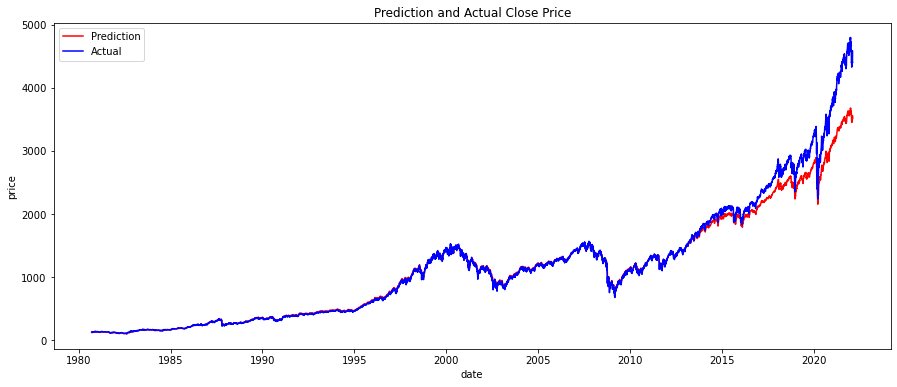

In [50]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 0], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 0], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Close Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

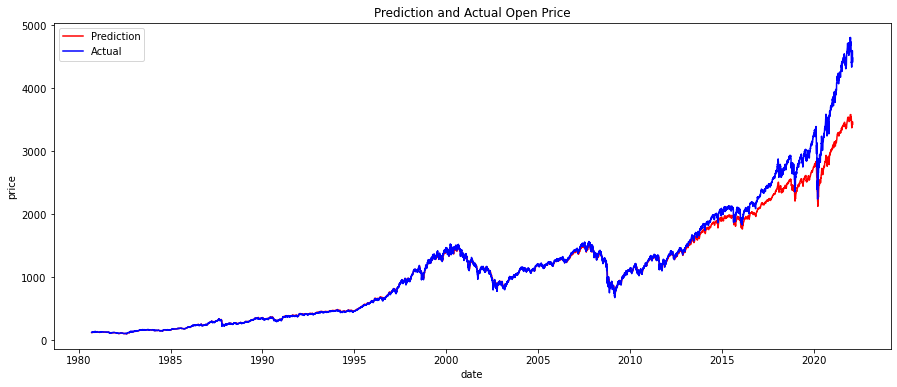

In [51]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 1], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 1], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Open Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

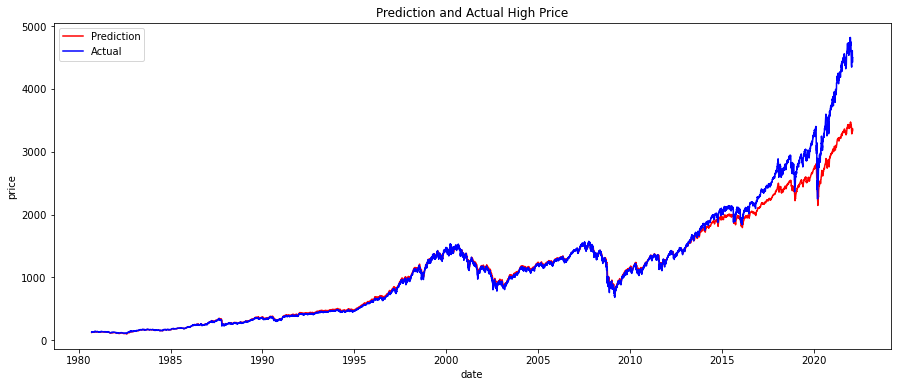

In [52]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 2], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 2], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual High Price")
plt.legend()
plt

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

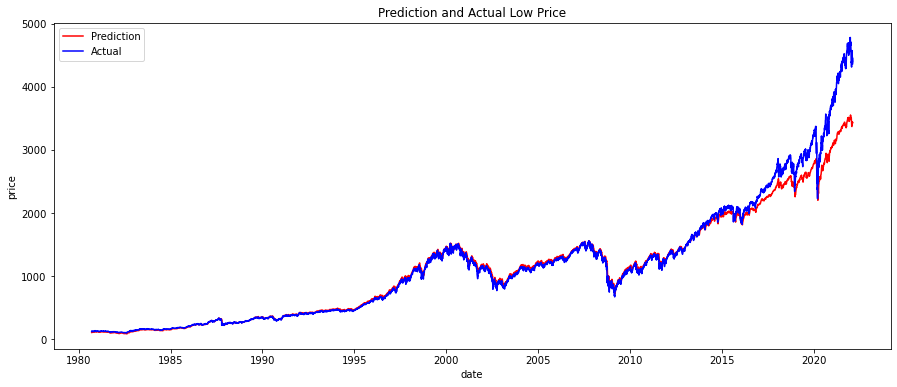

In [53]:
plt.figure(figsize=[15,6])
plt.plot(test_date_list[:, 0], prediction_val[:, 3], 'red', label = 'Prediction')
plt.plot(test_date_list[:, 0], actual[:, 3], 'blue', label = 'Actual')
plt.xlabel("date")

# date_ticks=np.arange(1996,2022,1)
# plt.xticks(date_ticks)

plt.ylabel("price")
plt.title("Prediction and Actual Low Price")
plt.legend()
plt

In [54]:
error_val = calculate_prediction_error(prediction_val, actual)
error_val

array([[0.05745283, 0.0355599 , 0.06515499, 0.14437109],
       [0.04550875, 0.03438938, 0.06636583, 0.13140033],
       [0.04625385, 0.03672062, 0.05333343, 0.13046476],
       ...,
       [0.2106213 , 0.21625526, 0.23799368, 0.22815934],
       [0.19836229, 0.21634471, 0.25242043, 0.22847315],
       [0.2020554 , 0.23475946, 0.25825298, 0.21417061]])

<module 'matplotlib.pyplot' from '/Users/hejianan/opt/anaconda3/envs/NN/lib/python3.7/site-packages/matplotlib/pyplot.py'>

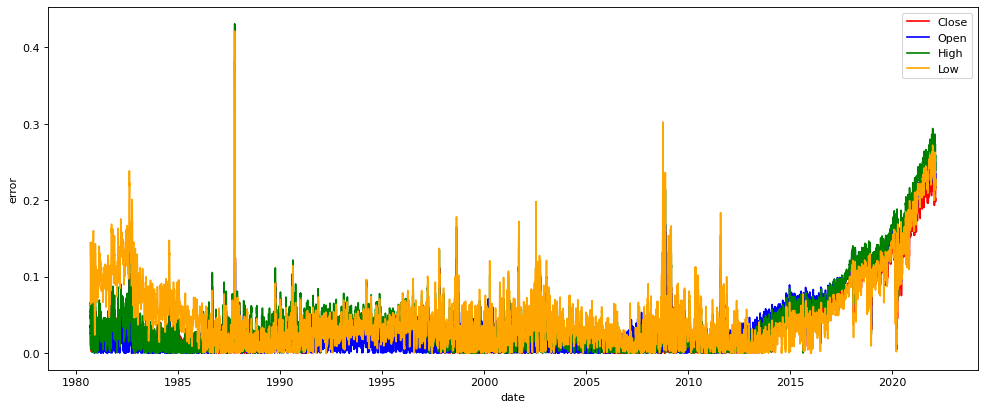

In [55]:
plt.figure(figsize=[15,6], dpi=80)
plt.plot(test_date_list[:, 0], error_val[:, 0], 'red', label = 'Close')
plt.plot(test_date_list[:, 0],error_val[:, 1], 'blue', label = 'Open')
plt.plot(test_date_list[:, 0],error_val[:, 2], 'green', label = 'High')
plt.plot(test_date_list[:, 0],error_val[:, 3], 'orange', label = 'Low')
plt.xlabel("date")
plt.ylabel("error")
plt.legend()
plt

In [56]:
def add_gaussian_noise(dataset, std_dev):
    dataset_reshape = dataset.reshape(dataset.shape[0] * dataset.shape[1] * dataset.shape[2], 1)
    noise = np.random.normal(0, std_dev, int(len(dataset_reshape) * 0.2))
    # Add the noise to image
    gp = np.random.uniform(0, dataset.shape[0] * dataset.shape[1] * dataset.shape[2], int(len(dataset_reshape) * 0.2))
    for i in range(int(len(dataset_reshape) * 0.2)):
        if dataset_reshape[int(gp[i])]==1:
            dataset_reshape[int(gp[i])]-=abs(noise[i])
        else:
            dataset_reshape[int(gp[i])]+=abs(noise[i])
    #gaussian_out = img + noise
    # Make the value between 0 and 1
    dataset_reshape = dataset_reshape.reshape(dataset.shape[0], dataset.shape[1], dataset.shape[2])
    gaussian_out = np.clip(dataset_reshape, 0.00000001, 1)
    return gaussian_out

In [57]:
std_dev = [0.001, 0.002, 0.003, 0.005, 0.01, 0.02, 0.03, 0.05, 0.1]
gaussian_error_array = np.zeros([len(std_dev), test_real.shape[0], test_real.shape[2]])
for i in range(len(std_dev)):
    gaussian_real_test = add_gaussian_noise(test_real, std_dev[i])
    gaussian_label_test = add_gaussian_noise(test_label, std_dev[i])
#     gaussian_output = model(gaussian_real_test)
    gaussian_output, hidden = model_val(Variable(torch.from_numpy(gaussian_real_test).float()))
    gaussian_prediction = scaler.inverse_transform(gaussian_output.detach().numpy())
    gaussian_actual = np.concatenate( (gaussian_label_test[:, :, 0], gaussian_label_test[:, :, 1], gaussian_label_test[:, :, 2], gaussian_label_test[:, :, 3]), axis = 1)
    gaussian_actual = scaler.inverse_transform(gaussian_actual)
    gaussian_error = calculate_prediction_error(gaussian_prediction, gaussian_actual)
    gaussian_error_array[i] = gaussian_error
gaussian_error_array

array([[[0.0557079 , 0.05034108, 0.06285549, 0.14236989],
        [0.03147684, 0.02596239, 0.05391806, 0.12118905],
        [0.08362996, 0.03567026, 0.05233983, 0.12947066],
        ...,
        [0.21051853, 0.21612293, 0.23787785, 0.22809205],
        [0.19822886, 0.2161544 , 0.25227313, 0.22838649],
        [0.20203354, 0.23470152, 0.25818765, 0.2141601 ]],

       [[0.03163496, 0.03365723, 0.04543232, 0.13053662],
        [0.0272124 , 0.0216565 , 0.0503283 , 0.13606749],
        [0.0690909 , 0.01750795, 0.0354848 , 0.1650609 ],
        ...,
        [0.21044151, 0.21597107, 0.23780249, 0.22806334],
        [0.19822239, 0.21614841, 0.25226503, 0.22837822],
        [0.20193892, 0.23472545, 0.25857922, 0.21392574]],

       [[0.00759701, 0.01203998, 0.02762728, 0.21006299],
        [0.00723081, 0.00533882, 0.02047504, 0.12155776],
        [0.04957655, 0.00361175, 0.01303841, 0.14327373],
        ...,
        [0.21224225, 0.2156272 , 0.23761471, 0.2276882 ],
        [0.19815145, 0.217686

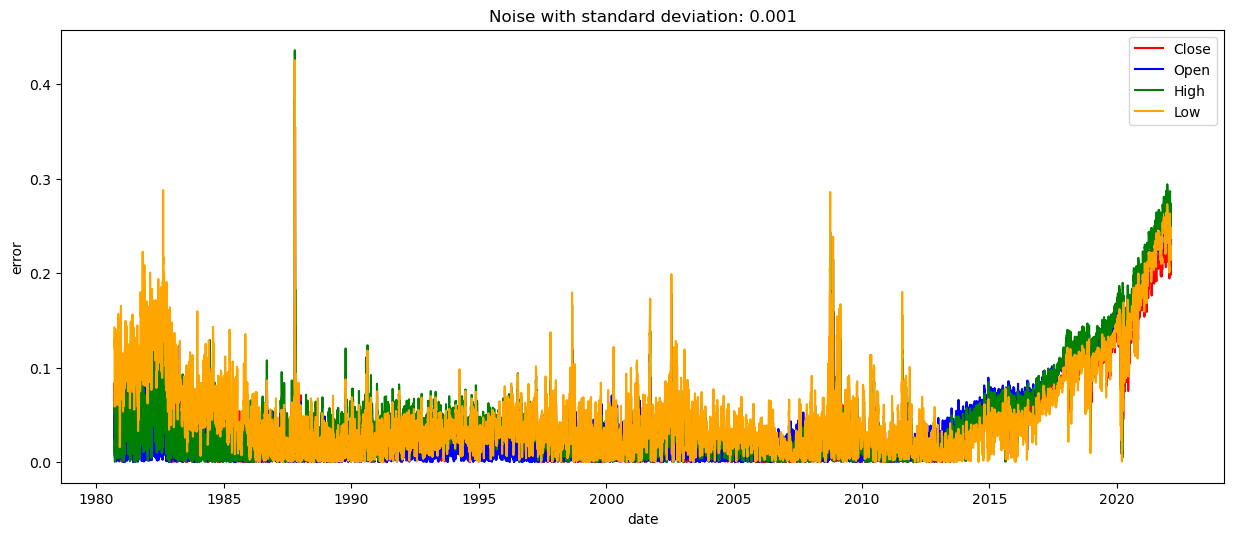

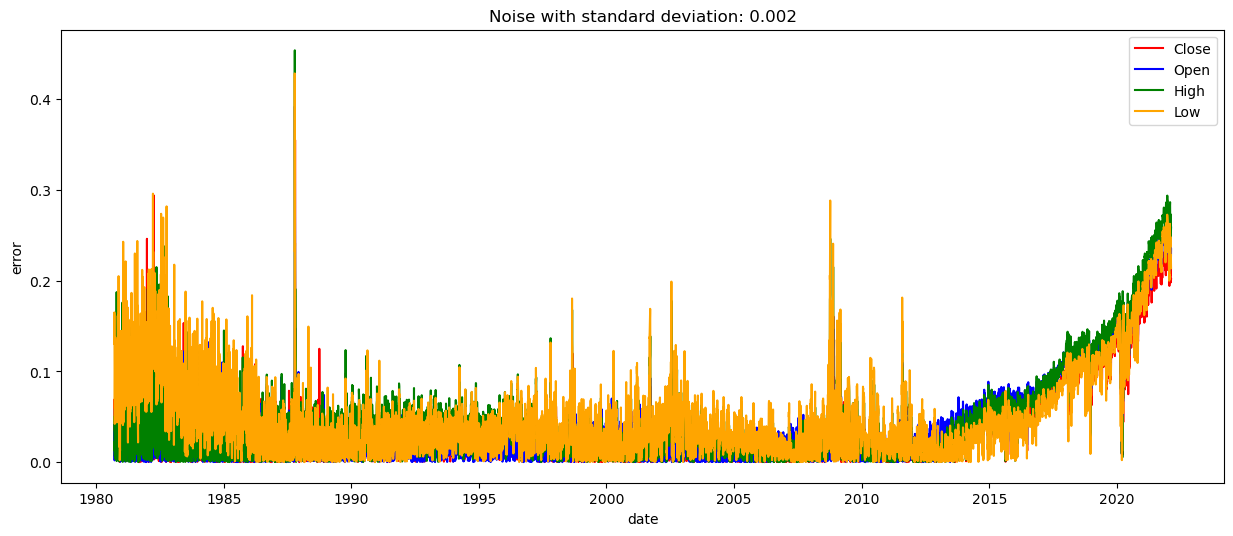

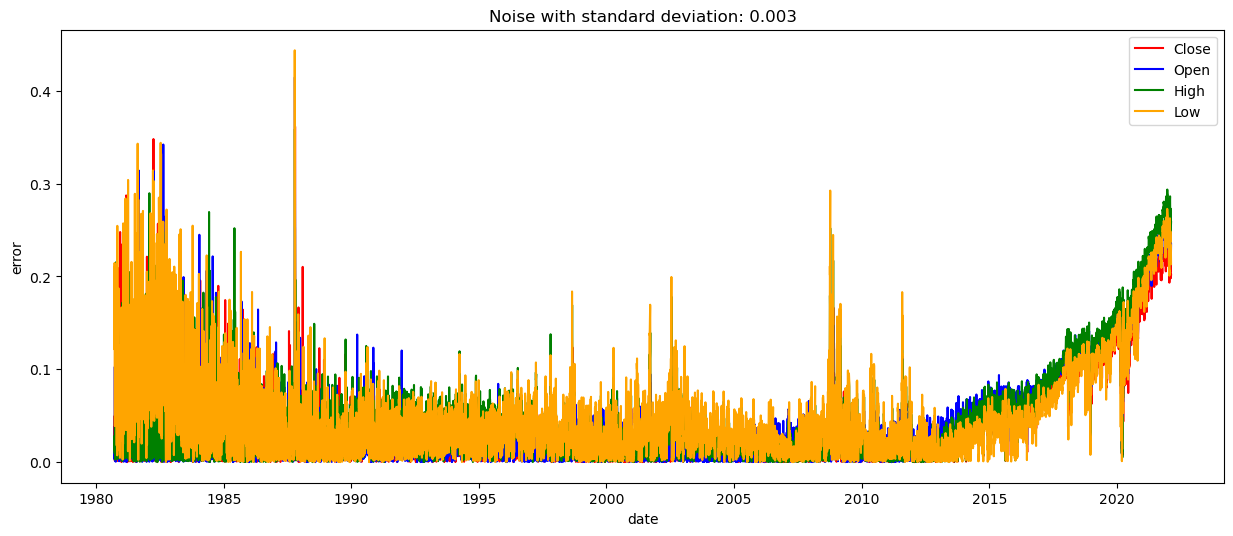

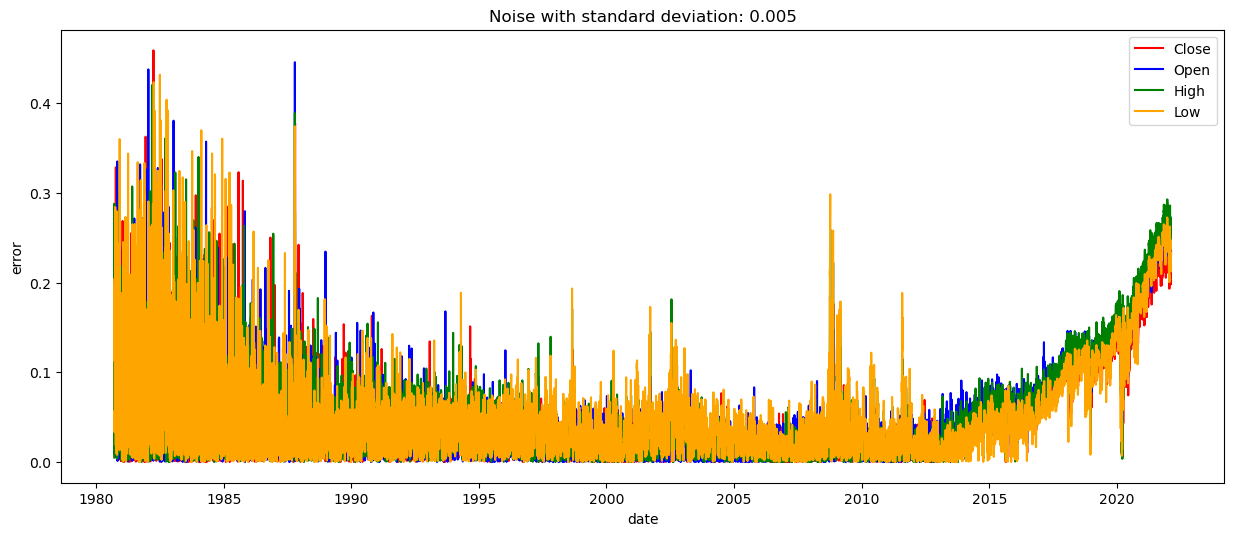

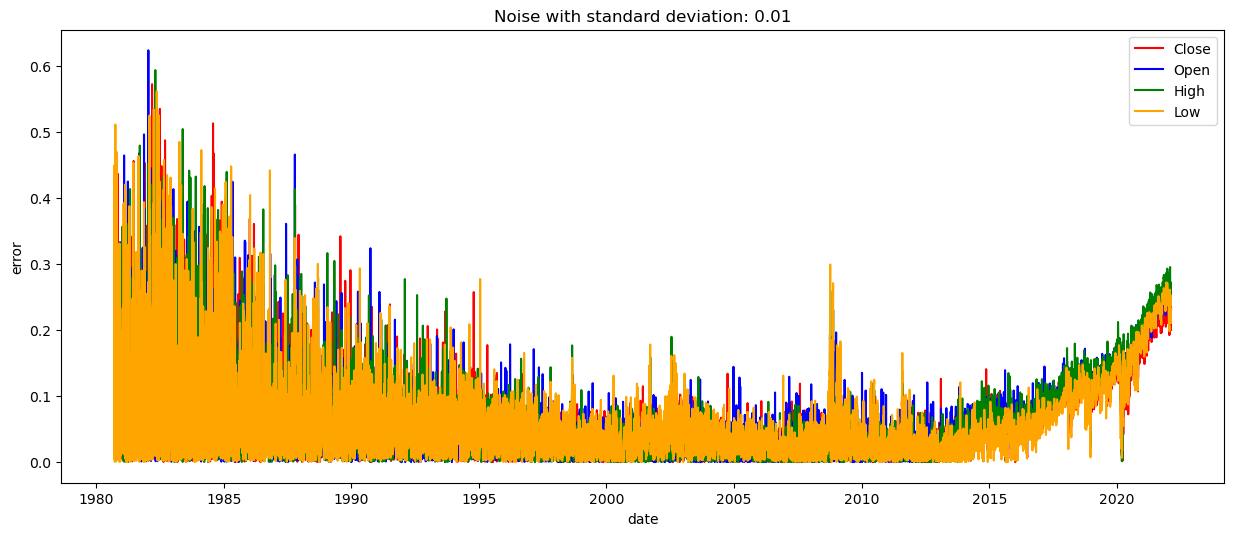

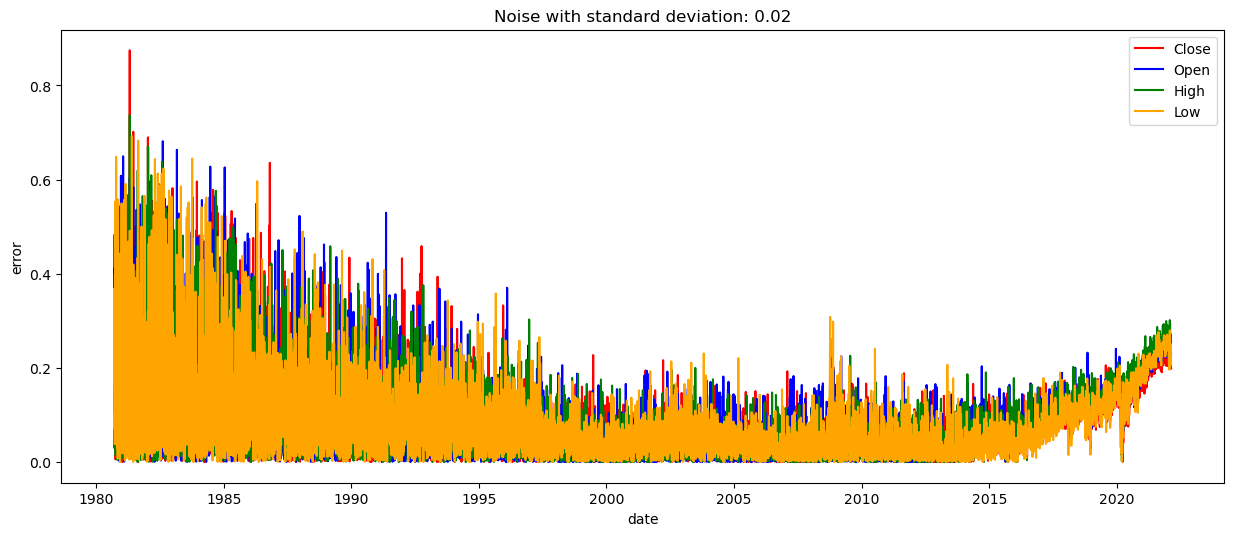

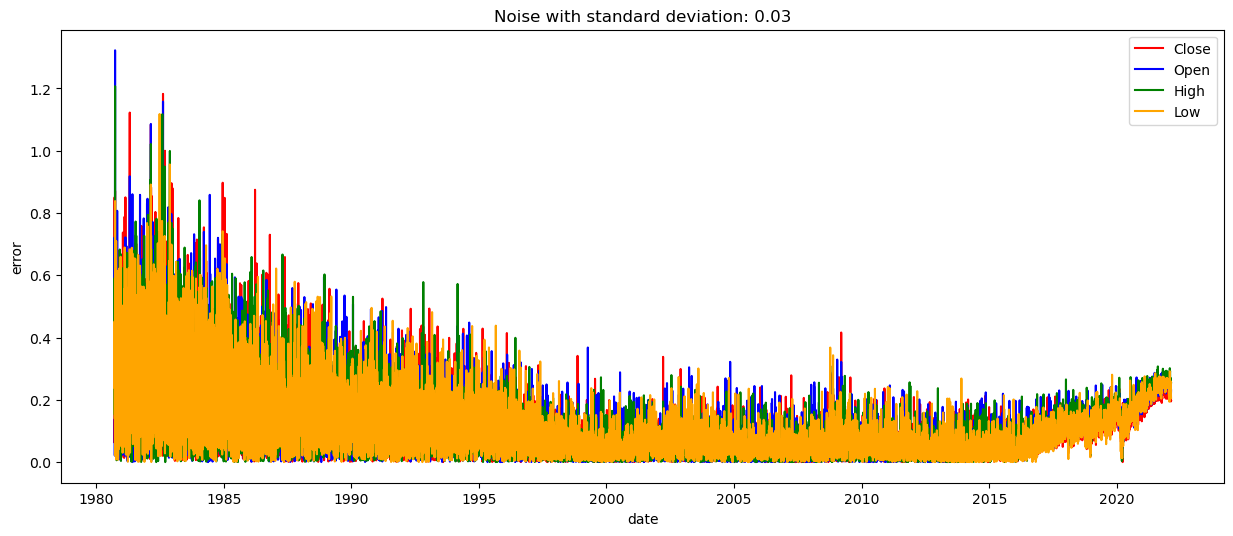

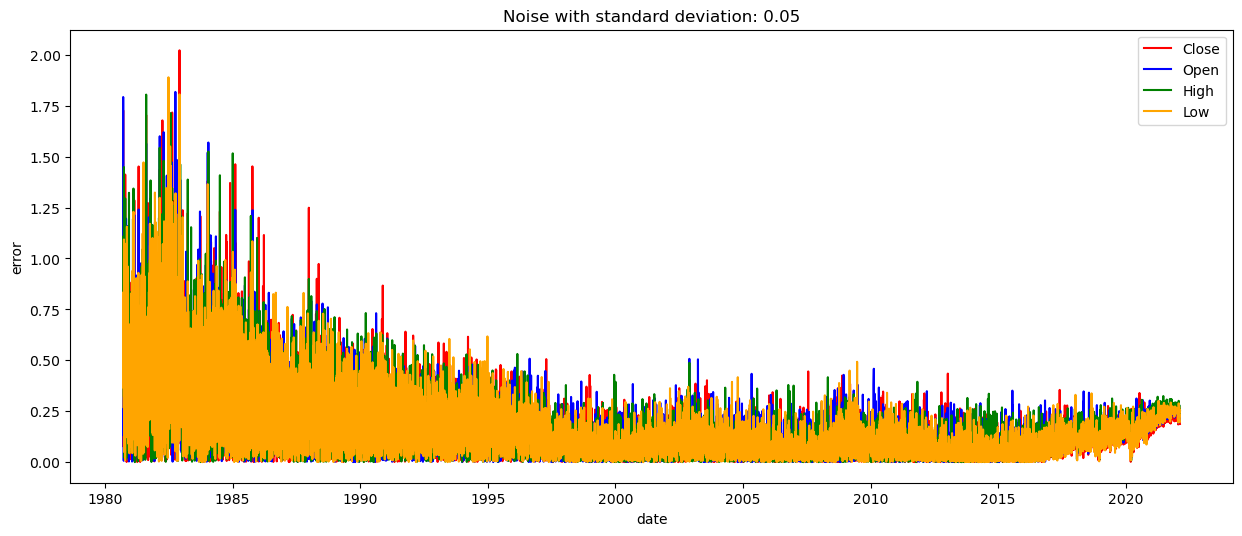

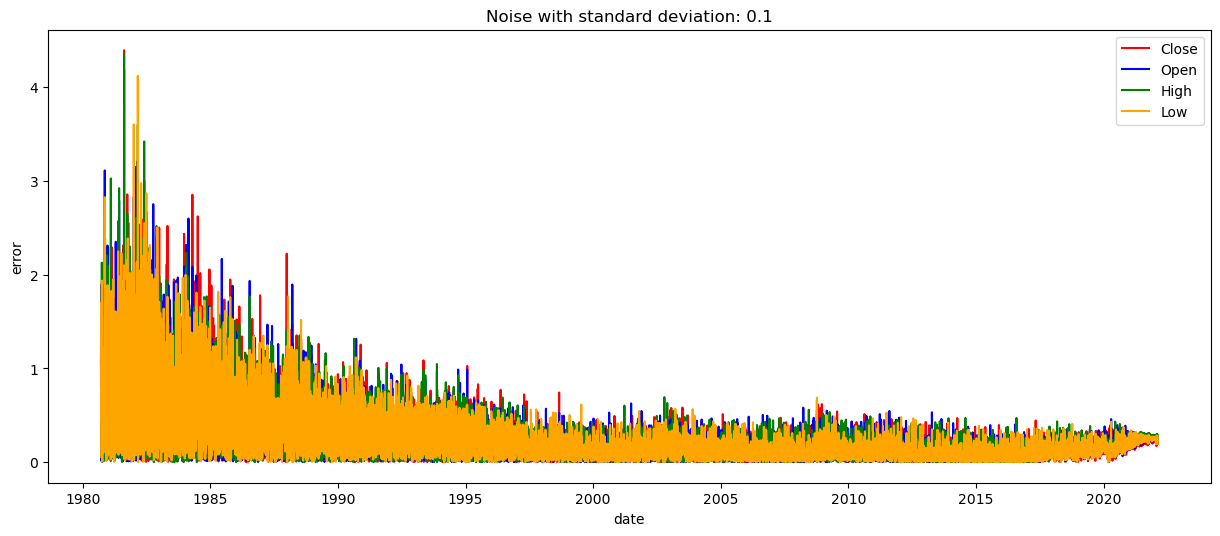

In [58]:
for i in range(len(std_dev)):
    plt.figure(figsize=[15,6], dpi=100)
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 0], 'red', label = 'Close')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 1], 'blue', label = 'Open')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 2], 'green', label = 'High')
    plt.plot(test_date_list[:, 0], gaussian_error_array[i, :, 3], 'orange', label = 'Low')
    plt.xlabel("date")
    plt.ylabel("error")
    plt.legend()
    plt.title("Noise with standard deviation: " + str(std_dev[i]))
    plt.show()